In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_c_label_50 = pd.read_csv('emotion_label/session1/C/emotion_C_20201111_1_50.csv')
data1_c_label_60 = pd.read_csv('emotion_label/session1/C/emotion_C_20201111_1_60.csv')
data1_c_label_70 = pd.read_csv('emotion_label/session1/C/emotion_C_20201111_1_70.csv')
data1_c_label_80 = pd.read_csv('emotion_label/session1/C/emotion_C_20201111_1_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/C/emotion_C_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/C/emotion_C_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/C/emotion_C_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/C/emotion_C_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_c_record_all_feature_50 = pd.read_csv('feature/C/data1_c_50_record_all_feature.csv')
data1_c_record_all_feature_60 = pd.read_csv('feature/C/data1_c_60_record_all_feature.csv')
data1_c_record_all_feature_70 = pd.read_csv('feature/C/data1_c_70_record_all_feature.csv')
data1_c_record_all_feature_80 = pd.read_csv('feature/C/data1_c_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/C/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/C/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/C/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/C/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_c_record_all_feature_50)
display(data1_c_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:07,2020-11-11 12:40:11,10145.054,-128.325,-49.914,92.539,-54.404,-163.588,101488.985084,94748.747375,...,8892,-1151,-1352,-1721,-1572,-1100,7.045010,215.780697,0.782779,383.845702
1,2020-11-11 12:40:08,2020-11-11 12:40:12,10141.041,-71.737,-14.066,119.790,143.093,-101.599,96020.519319,82529.385831,...,8892,-1151,-1352,-1715,-1572,-1100,7.045010,282.415181,0.391389,408.414881
2,2020-11-11 12:40:09,2020-11-11 12:40:13,10137.723,-121.398,55.933,67.763,20.992,-112.556,74876.710271,69993.853596,...,8892,-1114,-1220,-1715,-1584,-1100,7.827789,198.499846,0.391389,283.779818
3,2020-11-11 12:40:10,2020-11-11 12:40:14,10144.075,-159.622,-124.623,47.819,-69.766,-68.971,39539.789375,53107.783116,...,9409,-665,-1220,-1245,-1676,-692,5.870841,123.429122,0.782779,138.589461
4,2020-11-11 12:40:11,2020-11-11 12:40:15,10138.438,-190.679,-263.798,81.040,-5.743,-119.497,25226.800156,38448.885959,...,9409,-638,-1220,-1190,-1676,-692,6.653620,87.220321,0.782779,204.261997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,2020-11-11 12:54:49,2020-11-11 12:54:53,9355.494,-322.234,-3774.870,62.091,-51.138,-42.745,9251.137964,6333.579244,...,8904,-868,-4621,-410,-1749,-234,7.045010,53.968046,1.174168,92.264464
578,2020-11-11 12:54:50,2020-11-11 12:54:54,9247.038,-480.127,-3976.078,105.334,-86.059,-36.297,68856.728556,96283.466871,...,8191,-1456,-5580,-410,-1749,-393,5.870841,60.882606,1.174168,91.117451
579,2020-11-11 12:54:51,2020-11-11 12:54:55,9179.877,-614.520,-4107.153,86.109,-19.162,-49.036,77069.761871,120633.571600,...,8191,-1456,-5580,-410,-1749,-393,5.870841,67.701913,0.391389,79.096249
580,2020-11-11 12:54:52,2020-11-11 12:54:56,9133.082,-709.777,-4202.876,91.537,-36.808,-81.210,65760.795276,100313.837271,...,8191,-1456,-5580,-410,-1749,-442,12.133072,41.725930,0.391389,514.251137


,start_time,finish_time,emotion_level
0,5:37,5:41,3
1,5:38,5:42,3
2,5:39,5:43,3
3,5:40,5:44,3
4,5:41,5:45,3
...,...,...,...
577,20:19,20:23,1
578,20:20,20:24,1
579,20:21,20:25,1
580,20:22,20:26,1


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_c_label_50 = dropna(data1_c_label_50)
data1_c_label_60 = dropna(data1_c_label_60)
data1_c_label_70 = dropna(data1_c_label_70)
data1_c_label_80 = dropna(data1_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_c_label_50 = dropna(data1_c_label_50)
data1_c_label_60 = dropna(data1_c_label_60)
data1_c_label_70 = dropna(data1_c_label_70)
data1_c_label_80 = dropna(data1_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_c_label_50 = data1_c_label_50.drop(["start_time", "finish_time"], axis=1)
data1_c_label_60 = data1_c_label_60.drop(["start_time", "finish_time"], axis=1)
data1_c_label_70 = data1_c_label_70.drop(["start_time", "finish_time"], axis=1)
data1_c_label_80 = data1_c_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data1_c_label_50

,emotion_level
0,3
1,3
2,3
3,3
4,3
...,...
577,1
578,1
579,1
580,1


In [6]:
#feature_dataとemotion_labelデータを連結
data1_c_record_all_feature_50 = pd.concat([data1_c_record_all_feature_50, data1_c_label_50], axis=1, ignore_index=False)
data1_c_record_all_feature_60 = pd.concat([data1_c_record_all_feature_60, data1_c_label_60], axis=1, ignore_index=False)
data1_c_record_all_feature_70 = pd.concat([data1_c_record_all_feature_70, data1_c_label_70], axis=1, ignore_index=False)
data1_c_record_all_feature_80 = pd.concat([data1_c_record_all_feature_80, data1_c_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のCさんのデータを表示している)
display(data1_c_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:07,2020-11-11 12:40:11,10145.054,-128.325,-49.914,92.539,-54.404,-163.588,101488.985084,94748.747375,...,-1151,-1352,-1721,-1572,-1100,7.045010,215.780697,0.782779,383.845702,3
1,2020-11-11 12:40:08,2020-11-11 12:40:12,10141.041,-71.737,-14.066,119.790,143.093,-101.599,96020.519319,82529.385831,...,-1151,-1352,-1715,-1572,-1100,7.045010,282.415181,0.391389,408.414881,3
2,2020-11-11 12:40:09,2020-11-11 12:40:13,10137.723,-121.398,55.933,67.763,20.992,-112.556,74876.710271,69993.853596,...,-1114,-1220,-1715,-1584,-1100,7.827789,198.499846,0.391389,283.779818,3
3,2020-11-11 12:40:10,2020-11-11 12:40:14,10144.075,-159.622,-124.623,47.819,-69.766,-68.971,39539.789375,53107.783116,...,-665,-1220,-1245,-1676,-692,5.870841,123.429122,0.782779,138.589461,3
4,2020-11-11 12:40:11,2020-11-11 12:40:15,10138.438,-190.679,-263.798,81.040,-5.743,-119.497,25226.800156,38448.885959,...,-638,-1220,-1190,-1676,-692,6.653620,87.220321,0.782779,204.261997,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,2020-11-11 12:54:49,2020-11-11 12:54:53,9355.494,-322.234,-3774.870,62.091,-51.138,-42.745,9251.137964,6333.579244,...,-868,-4621,-410,-1749,-234,7.045010,53.968046,1.174168,92.264464,1
578,2020-11-11 12:54:50,2020-11-11 12:54:54,9247.038,-480.127,-3976.078,105.334,-86.059,-36.297,68856.728556,96283.466871,...,-1456,-5580,-410,-1749,-393,5.870841,60.882606,1.174168,91.117451,1
579,2020-11-11 12:54:51,2020-11-11 12:54:55,9179.877,-614.520,-4107.153,86.109,-19.162,-49.036,77069.761871,120633.571600,...,-1456,-5580,-410,-1749,-393,5.870841,67.701913,0.391389,79.096249,1
580,2020-11-11 12:54:52,2020-11-11 12:54:56,9133.082,-709.777,-4202.876,91.537,-36.808,-81.210,65760.795276,100313.837271,...,-1456,-5580,-410,-1749,-442,12.133072,41.725930,0.391389,514.251137,1


In [7]:
data1_c_record_all_feature_60

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:07,2020-11-11 12:40:11,10145.054,-128.325,-49.914,92.539,-54.404,-163.588,101488.985084,94748.747375,...,-1151,-1352,-1721,-1572,-1100,7.045010,215.780697,0.782779,383.845702,3
1,2020-11-11 12:40:08,2020-11-11 12:40:12,10141.041,-71.737,-14.066,119.790,143.093,-101.599,96020.519319,82529.385831,...,-1151,-1352,-1715,-1572,-1100,7.045010,282.415181,0.391389,408.414881,3
2,2020-11-11 12:40:09,2020-11-11 12:40:13,10137.723,-121.398,55.933,67.763,20.992,-112.556,74876.710271,69993.853596,...,-1114,-1220,-1715,-1584,-1100,7.827789,198.499846,0.391389,283.779818,3
3,2020-11-11 12:40:10,2020-11-11 12:40:14,10144.075,-159.622,-124.623,47.819,-69.766,-68.971,39539.789375,53107.783116,...,-665,-1220,-1245,-1676,-692,5.870841,123.429122,0.782779,138.589461,3
4,2020-11-11 12:40:11,2020-11-11 12:40:15,10138.438,-190.679,-263.798,81.040,-5.743,-119.497,25226.800156,38448.885959,...,-638,-1220,-1190,-1676,-692,6.653620,87.220321,0.782779,204.261997,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2020-11-11 12:54:49,2020-11-11 12:54:53,9355.494,-322.234,-3774.870,62.091,-51.138,-42.745,9251.137964,6333.579244,...,-868,-4621,-410,-1749,-234,7.045010,53.968046,1.174168,92.264464,1
557,2020-11-11 12:54:50,2020-11-11 12:54:54,9247.038,-480.127,-3976.078,105.334,-86.059,-36.297,68856.728556,96283.466871,...,-1456,-5580,-410,-1749,-393,5.870841,60.882606,1.174168,91.117451,1
558,2020-11-11 12:54:51,2020-11-11 12:54:55,9179.877,-614.520,-4107.153,86.109,-19.162,-49.036,77069.761871,120633.571600,...,-1456,-5580,-410,-1749,-393,5.870841,67.701913,0.391389,79.096249,1
559,2020-11-11 12:54:52,2020-11-11 12:54:56,9133.082,-709.777,-4202.876,91.537,-36.808,-81.210,65760.795276,100313.837271,...,-1456,-5580,-410,-1749,-442,12.133072,41.725930,0.391389,514.251137,1


In [8]:
print(len(data1_c_record_all_feature_50))
print(len(data1_c_record_all_feature_60))
print(len(data1_c_record_all_feature_70))
print(len(data1_c_record_all_feature_80))

582
561
533
504


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data1_c_50_record_all_feature_1 = data1_c_record_all_feature_50.iloc[0:194]
data1_c_50_record_all_feature_2 = data1_c_record_all_feature_50.iloc[194:388]
data1_c_50_record_all_feature_3 = data1_c_record_all_feature_50.iloc[388:582]

data1_c_60_record_all_feature_1 = data1_c_record_all_feature_60.iloc[0:187]
data1_c_60_record_all_feature_2 = data1_c_record_all_feature_60.iloc[187:374]
data1_c_60_record_all_feature_3 = data1_c_record_all_feature_60.iloc[374:561]

data1_c_70_record_all_feature_1 = data1_c_record_all_feature_70.iloc[0:178]
data1_c_70_record_all_feature_2 = data1_c_record_all_feature_70.iloc[178:356]
data1_c_70_record_all_feature_3 = data1_c_record_all_feature_70.iloc[356:533]

data1_c_80_record_all_feature_1 = data1_c_record_all_feature_80.iloc[0:168]
data1_c_80_record_all_feature_2 = data1_c_record_all_feature_80.iloc[168:336]
data1_c_80_record_all_feature_3 = data1_c_record_all_feature_80.iloc[336:504]


# data1_c_50_record_all_feature_1 = data1_c_record_all_feature_50.iloc[0:150]
# data1_c_50_record_all_feature_2 = data1_c_record_all_feature_50.iloc[150:300]
# data1_c_50_record_all_feature_3 = data1_c_record_all_feature_50.iloc[300:470]

# data1_c_60_record_all_feature_1 = data1_c_record_all_feature_60.iloc[0:150]
# data1_c_60_record_all_feature_2 = data1_c_record_all_feature_60.iloc[150:300]
# data1_c_60_record_all_feature_3 = data1_c_record_all_feature_60.iloc[300:470]

# data1_c_70_record_all_feature_1 = data1_c_record_all_feature_70.iloc[0:150]
# data1_c_70_record_all_feature_2 = data1_c_record_all_feature_70.iloc[150:300]
# data1_c_70_record_all_feature_3 = data1_c_record_all_feature_70.iloc[300:470]

# data1_c_80_record_all_feature_1 = data1_c_record_all_feature_80.iloc[0:150]
# data1_c_80_record_all_feature_2 = data1_c_record_all_feature_80.iloc[150:300]
# data1_c_80_record_all_feature_3 = data1_c_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_c_50_record_all_feature_1 = emotion_level_define(data1_c_50_record_all_feature_1)
data1_c_50_record_all_feature_2 = emotion_level_define(data1_c_50_record_all_feature_2)
data1_c_50_record_all_feature_3 = emotion_level_define(data1_c_50_record_all_feature_3)

data1_c_60_record_all_feature_1 = emotion_level_define(data1_c_60_record_all_feature_1)
data1_c_60_record_all_feature_2 = emotion_level_define(data1_c_60_record_all_feature_2)
data1_c_60_record_all_feature_3 = emotion_level_define(data1_c_60_record_all_feature_3)

data1_c_70_record_all_feature_1 = emotion_level_define(data1_c_70_record_all_feature_1)
data1_c_70_record_all_feature_2 = emotion_level_define(data1_c_70_record_all_feature_2)
data1_c_70_record_all_feature_3 = emotion_level_define(data1_c_70_record_all_feature_3)

data1_c_80_record_all_feature_1 = emotion_level_define(data1_c_80_record_all_feature_1)
data1_c_80_record_all_feature_2 = emotion_level_define(data1_c_80_record_all_feature_2)
data1_c_80_record_all_feature_3 = emotion_level_define(data1_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_c_50_record_all_feature_1 = emotion_level_drop(data1_c_50_record_all_feature_1)
data1_c_50_record_all_feature_2 = emotion_level_drop(data1_c_50_record_all_feature_2)
data1_c_50_record_all_feature_3 = emotion_level_drop(data1_c_50_record_all_feature_3)

data1_c_60_record_all_feature_1 = emotion_level_drop(data1_c_60_record_all_feature_1)
data1_c_60_record_all_feature_2 = emotion_level_drop(data1_c_60_record_all_feature_2)
data1_c_60_record_all_feature_3 = emotion_level_drop(data1_c_60_record_all_feature_3)

data1_c_70_record_all_feature_1 = emotion_level_drop(data1_c_70_record_all_feature_1)
data1_c_70_record_all_feature_2 = emotion_level_drop(data1_c_70_record_all_feature_2)
data1_c_70_record_all_feature_3 = emotion_level_drop(data1_c_70_record_all_feature_3)

data1_c_80_record_all_feature_1 = emotion_level_drop(data1_c_80_record_all_feature_1)
data1_c_80_record_all_feature_2 = emotion_level_drop(data1_c_80_record_all_feature_2)
data1_c_80_record_all_feature_3 = emotion_level_drop(data1_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data1_c_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:07,2020-11-11 12:40:11,10145.054,-128.325,-49.914,92.539,-54.404,-163.588,101488.985084,94748.747375,...,-1151,-1352,-1721,-1572,-1100,7.045010,215.780697,0.782779,383.845702,positive
1,2020-11-11 12:40:08,2020-11-11 12:40:12,10141.041,-71.737,-14.066,119.790,143.093,-101.599,96020.519319,82529.385831,...,-1151,-1352,-1715,-1572,-1100,7.045010,282.415181,0.391389,408.414881,positive
2,2020-11-11 12:40:09,2020-11-11 12:40:13,10137.723,-121.398,55.933,67.763,20.992,-112.556,74876.710271,69993.853596,...,-1114,-1220,-1715,-1584,-1100,7.827789,198.499846,0.391389,283.779818,positive
3,2020-11-11 12:40:10,2020-11-11 12:40:14,10144.075,-159.622,-124.623,47.819,-69.766,-68.971,39539.789375,53107.783116,...,-665,-1220,-1245,-1676,-692,5.870841,123.429122,0.782779,138.589461,positive
4,2020-11-11 12:40:11,2020-11-11 12:40:15,10138.438,-190.679,-263.798,81.040,-5.743,-119.497,25226.800156,38448.885959,...,-638,-1220,-1190,-1676,-692,6.653620,87.220321,0.782779,204.261997,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-11-11 12:44:14,2020-11-11 12:44:18,10147.294,141.767,89.381,97.109,-11.886,-99.727,11097.053564,39378.920711,...,-315,-741,-1032,-1194,-746,5.088063,65.789019,0.391389,277.340601,positive
190,2020-11-11 12:44:15,2020-11-11 12:44:19,10148.836,114.877,103.266,51.855,78.012,-138.770,9294.823104,29241.429871,...,-315,-741,-1032,-1176,-649,6.653620,39.469182,0.391389,201.481406,positive
191,2020-11-11 12:44:22,2020-11-11 12:44:26,10139.508,374.646,-51.038,77.873,28.086,-113.492,5795.759936,2572.676684,...,247,-600,-154,-584,-246,3.522505,65.112013,0.391389,63.250190,other
192,2020-11-11 12:44:23,2020-11-11 12:44:27,10143.500,361.244,-59.677,78.723,31.566,-113.286,2936.846000,2434.396464,...,242,-478,-233,-383,-320,3.522505,40.031011,0.391389,38.285927,other


In [14]:
#全データからpositiveの数を確認
data1_c_50_record_all_feature_positive_1 = data1_c_50_record_all_feature_1[data1_c_50_record_all_feature_1.label == "positive"]
data1_c_50_record_all_feature_positive_1 = data1_c_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_positive_1))

data1_c_50_record_all_feature_positive_2 = data1_c_50_record_all_feature_2[data1_c_50_record_all_feature_2.label == "positive"]
data1_c_50_record_all_feature_positive_2 = data1_c_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_positive_2))

data1_c_50_record_all_feature_positive_3 = data1_c_50_record_all_feature_3[data1_c_50_record_all_feature_3.label == "positive"]
data1_c_50_record_all_feature_positive_3 = data1_c_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_positive_3))

data1_c_60_record_all_feature_positive_1 = data1_c_60_record_all_feature_1[data1_c_60_record_all_feature_1.label == "positive"]
data1_c_60_record_all_feature_positive_1 = data1_c_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_positive_1))

data1_c_60_record_all_feature_positive_2 = data1_c_60_record_all_feature_2[data1_c_60_record_all_feature_2.label == "positive"]
data1_c_60_record_all_feature_positive_2 = data1_c_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_positive_2))

data1_c_60_record_all_feature_positive_3 = data1_c_60_record_all_feature_3[data1_c_60_record_all_feature_3.label == "positive"]
data1_c_60_record_all_feature_positive_3 = data1_c_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_positive_3))

data1_c_70_record_all_feature_positive_1 = data1_c_70_record_all_feature_1[data1_c_70_record_all_feature_1.label == "positive"]
data1_c_670_record_all_feature_positive_1 = data1_c_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_positive_1))

data1_c_70_record_all_feature_positive_2 = data1_c_70_record_all_feature_2[data1_c_70_record_all_feature_2.label == "positive"]
data1_c_70_record_all_feature_positive_2 = data1_c_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_positive_2))

data1_c_70_record_all_feature_positive_3 = data1_c_70_record_all_feature_3[data1_c_70_record_all_feature_3.label == "positive"]
data1_c_70_record_all_feature_positive_3 = data1_c_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_positive_3))

data1_c_80_record_all_feature_positive_1 = data1_c_80_record_all_feature_1[data1_c_80_record_all_feature_1.label == "positive"]
data1_c_80_record_all_feature_positive_1 = data1_c_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_positive_1))

data1_c_80_record_all_feature_positive_2 = data1_c_80_record_all_feature_2[data1_c_80_record_all_feature_2.label == "positive"]
data1_c_80_record_all_feature_positive_2 = data1_c_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_positive_2))

data1_c_80_record_all_feature_positive_3 = data1_c_80_record_all_feature_3[data1_c_80_record_all_feature_3.label == "positive"]
data1_c_80_record_all_feature_positive_3 = data1_c_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_positive_3))

155
115
75
151
109
71
149
100
67
145
93
62


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data1_c_50_record_all_feature_other_1 = data1_c_50_record_all_feature_1[data1_c_50_record_all_feature_1.label == "other"]
data1_c_50_record_all_feature_other_1 = data1_c_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_other_1))

data1_c_50_record_all_feature_other_2 = data1_c_50_record_all_feature_2[data1_c_50_record_all_feature_2.label == "other"]
data1_c_50_record_all_feature_other_2 = data1_c_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_other_2))

data1_c_50_record_all_feature_other_3 = data1_c_50_record_all_feature_3[data1_c_50_record_all_feature_3.label == "other"]
data1_c_50_record_all_feature_other_3 = data1_c_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_c_50_record_all_feature_other_3))

data1_c_60_record_all_feature_other_2 = data1_c_60_record_all_feature_2[data1_c_60_record_all_feature_2.label == "other"]
data1_c_60_record_all_feature_other_2 = data1_c_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_other_2))

data1_c_60_record_all_feature_other_3 = data1_c_60_record_all_feature_3[data1_c_60_record_all_feature_3.label == "other"]
data1_c_60_record_all_feature_other_3 = data1_c_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_other_3))

data1_c_60_record_all_feature_other_1 = data1_c_60_record_all_feature_1[data1_c_60_record_all_feature_1.label == "other"]
data1_c_60_record_all_feature_other_1 = data1_c_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_c_60_record_all_feature_other_1))

data1_c_70_record_all_feature_other_2 = data1_c_70_record_all_feature_2[data1_c_70_record_all_feature_2.label == "other"]
data1_c_70_record_all_feature_other_2 = data1_c_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_other_2))

data1_c_70_record_all_feature_other_3 = data1_c_70_record_all_feature_3[data1_c_70_record_all_feature_3.label == "other"]
data1_c_70_record_all_feature_other_3 = data1_c_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_other_3))

data1_c_70_record_all_feature_other_1 = data1_c_70_record_all_feature_1[data1_c_70_record_all_feature_1.label == "other"]
data1_c_70_record_all_feature_other_1 = data1_c_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_c_70_record_all_feature_other_1))

data1_c_80_record_all_feature_other_2 = data1_c_80_record_all_feature_2[data1_c_80_record_all_feature_2.label == "other"]
data1_c_80_record_all_feature_other_2 = data1_c_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_other_2))

data1_c_80_record_all_feature_other_3 = data1_c_80_record_all_feature_3[data1_c_80_record_all_feature_3.label == "other"]
data1_c_80_record_all_feature_other_3 = data1_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_other_3))

data1_c_80_record_all_feature_other_3 = data1_c_80_record_all_feature_3[data1_c_80_record_all_feature_3.label == "other"]
data1_c_80_record_all_feature_other_3 = data1_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_c_80_record_all_feature_other_3))

39
79
119
78
116
36
78
110
29
75
106
106


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_c_60_record_all_feature_1, data1_c_60_record_all_feature_2], ignore_index=True)
test_data = data1_c_60_record_all_feature_3

In [19]:
train_data.columns

Index(['start_time', 'finish_time', 'accx_mean', 'accy_mean', 'accz_mean',
       'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'accx_var', 'accy_var',
       'accz_var', 'gyrx_var', 'gyry_var', 'gyrz_var', 'accx_max', 'accy_max',
       'accz_max', 'gyrx_max', 'gyry_max', 'gyrz_max', 'accx_min', 'accy_min',
       'accz_min', 'gyrx_min', 'gyry_min', 'gyrz_min', 'accn_max_fq',
       'accn_max_peak', 'gyrn_max_fq', 'gyrn_max_peak', 'label'],
      dtype='object')

In [20]:
train_data = train_data[['start_time', 'finish_time', 'accx_mean', 'accy_mean', 'accz_mean', 'accx_var', 'accy_var','accz_var', 'accx_max', 'accy_max','accz_max','accx_min', 'accy_min','accz_min', 'accn_max_fq','accn_max_peak','label']]

In [21]:
train_data.iloc[0:,2:16]

,accx_mean,accy_mean,accz_mean,accx_var,accy_var,accz_var,accx_max,accy_max,accz_max,accx_min,accy_min,accz_min,accn_max_fq,accn_max_peak
0,10145.054,-128.325,-49.914,101488.985084,94748.747375,265112.208604,11462,781,1145,8892,-1151,-1352,7.045010,215.780697
1,10141.041,-71.737,-14.066,96020.519319,82529.385831,270087.955644,11462,781,1055,8892,-1151,-1352,7.045010,282.415181
2,10137.723,-121.398,55.933,74876.710271,69993.853596,229295.390511,11462,618,1055,8892,-1114,-1220,7.827789,198.499846
3,10144.075,-159.622,-124.623,39539.789375,53107.783116,225850.628871,10725,618,1055,9409,-665,-1220,5.870841,123.429122
4,10138.438,-190.679,-263.798,25226.800156,38448.885959,213287.207196,10701,379,1055,9409,-638,-1220,6.653620,87.220321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,10105.975,-146.046,-852.783,3748.816375,859.285884,11875.947911,10439,-58,-287,9822,-261,-1129,9.393346,15.894895
370,10107.387,-147.817,-833.426,4030.801231,949.473511,13763.102524,10439,-53,-287,9822,-266,-1129,8.610568,17.235251
371,10108.718,-152.416,-819.898,4039.864476,930.142944,13653.159596,10439,-53,-287,9822,-266,-1129,8.219178,23.569032
372,10109.459,-156.832,-806.946,5845.426319,1080.925776,15196.361084,10439,-53,-287,9795,-290,-1132,3.522505,41.904028


In [22]:
X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [23]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.45454545454545453
誤った個数：102
classification report
              precision    recall  f1-score   support

       other       0.55      0.70      0.61       116
    positive       0.10      0.06      0.07        71

    accuracy                           0.45       187
   macro avg       0.32      0.38      0.34       187
weighted avg       0.38      0.45      0.41       187

Confusion matrix, without normalization
[[81 35]
 [67  4]]


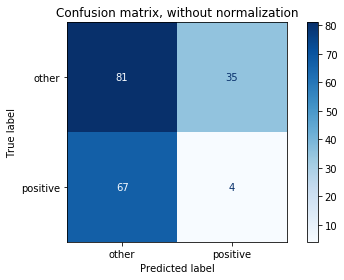

Normalized confusion matrix
[[0.69827586 0.30172414]
 [0.94366197 0.05633803]]


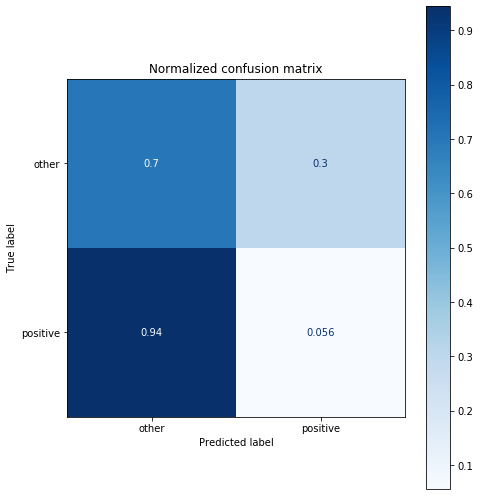

In [24]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [25]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_c_record_all_feature_50.iloc[0:374]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_c_record_all_feature_50.iloc[374:561]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_c_record_all_feature_50.iloc[374:561]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:52,2020-11-11 12:49:56,other,0.0
1,2020-11-11 12:49:53,2020-11-11 12:49:57,other,0.0
2,2020-11-11 12:49:54,2020-11-11 12:49:58,other,0.0
3,2020-11-11 12:49:55,2020-11-11 12:49:59,other,0.0
4,2020-11-11 12:49:56,2020-11-11 12:50:00,other,0.0
...,...,...,...,...
182,2020-11-11 12:54:21,2020-11-11 12:54:25,positive,1.0
183,2020-11-11 12:54:22,2020-11-11 12:54:26,positive,1.0
184,2020-11-11 12:54:23,2020-11-11 12:54:27,positive,1.0
185,2020-11-11 12:54:24,2020-11-11 12:54:28,positive,1.0


In [26]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:52,2020-11-11 12:49:56,other,0.0
1,2020-11-11 12:49:53,2020-11-11 12:49:57,other,0.0
2,2020-11-11 12:49:54,2020-11-11 12:49:58,other,0.0
3,2020-11-11 12:49:55,2020-11-11 12:49:59,other,0.0
4,2020-11-11 12:49:56,2020-11-11 12:50:00,other,0.0
...,...,...,...,...
182,2020-11-11 12:54:21,2020-11-11 12:54:25,other,0.0
183,2020-11-11 12:54:22,2020-11-11 12:54:26,other,0.0
184,2020-11-11 12:54:23,2020-11-11 12:54:27,other,0.0
185,2020-11-11 12:54:24,2020-11-11 12:54:28,other,0.0


In [27]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [28]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [29]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:40:07,2020-11-11 12:40:11,positive,1.0
2020-11-11 12:40:08,2020-11-11 12:40:12,positive,1.0
2020-11-11 12:40:09,2020-11-11 12:40:13,positive,1.0
2020-11-11 12:40:10,2020-11-11 12:40:14,positive,1.0
2020-11-11 12:40:11,2020-11-11 12:40:15,positive,1.0
...,...,...,...
2020-11-11 12:54:21,2020-11-11 12:54:25,other,0.0
2020-11-11 12:54:22,2020-11-11 12:54:26,other,0.0
2020-11-11 12:54:23,2020-11-11 12:54:27,other,0.0


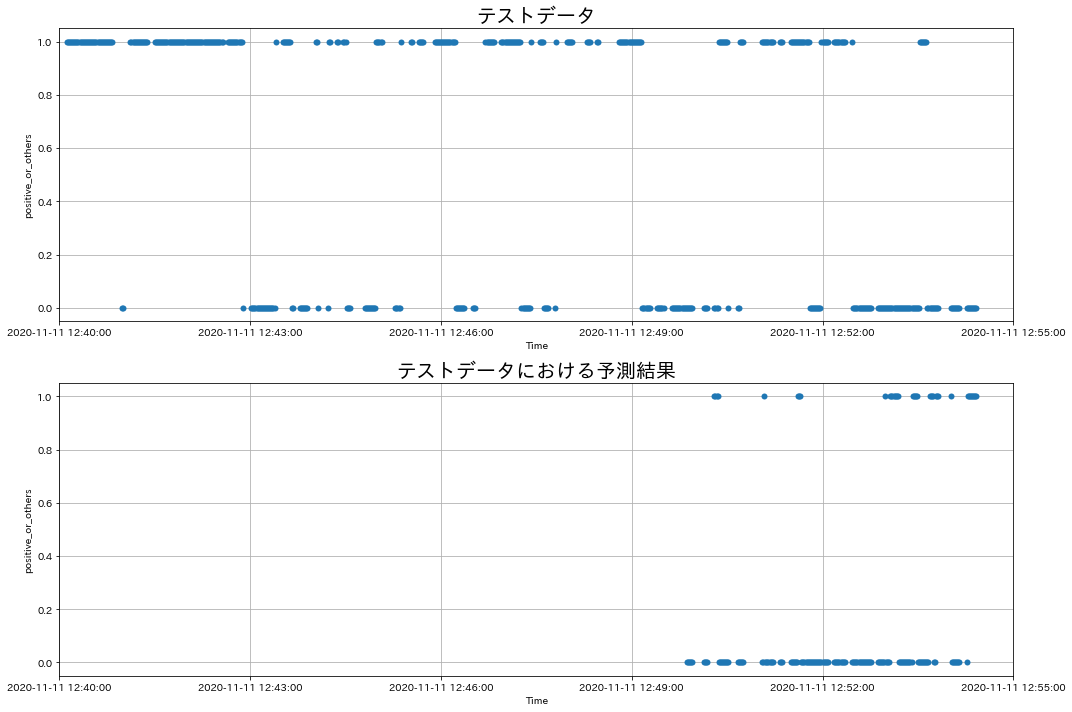

In [30]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()